<a href="https://colab.research.google.com/github/Eric-Mendes/previsao-da-rodada/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
RODADAS = 11
rodadas = (f'{n:02}' for n in range(1, RODADAS+1))

In [3]:
data = []
for rodada in rodadas:
  with requests.get(f'https://api.cartolafc.globo.com/partidas/{rodada}') as response:
      assert response.status_code == 200
      partidas = response.json()['partidas']
      for partida in partidas:
        if partida['placar_oficial_mandante'] is not None:
          partida = [
                    rodada, 
                    partida['clube_casa_id'], 
                    partida['placar_oficial_mandante'], 
                    partida['placar_oficial_visitante'], 
                    partida['clube_visitante_id']]
          data.append(partida)

df = pd.DataFrame(data, columns=['RODADA', 
                                 'ID MANDANTE', 
                                 'PLACAR MANDANTE', 
                                 'PLACAR VISITANTE', 
                                 'ID VISITANTE'])

In [4]:
TOTAL_JOGOS = len(df)
GOLS_FEITOS_MANDANTE_COUNT = sum(df['PLACAR MANDANTE'])
GOLS_FEITOS_VISITANTE_COUNT = sum(df['PLACAR VISITANTE'])

GOLS_FEITOS_MANDANTE_AVG = GOLS_FEITOS_MANDANTE_COUNT / TOTAL_JOGOS
GOLS_FEITOS_VISITANTE_AVG = GOLS_FEITOS_VISITANTE_COUNT / TOTAL_JOGOS

gols_feitos_stats = {'total_jogos': TOTAL_JOGOS, 'count_mandante': GOLS_FEITOS_MANDANTE_COUNT, 
                     'count_visitante': GOLS_FEITOS_VISITANTE_COUNT, 'avg_mandante': GOLS_FEITOS_MANDANTE_AVG, 
                     'avg_visitante': GOLS_FEITOS_VISITANTE_AVG}

In [5]:
GOLS_TOMADOS_MANDANTE_COUNT = sum(df['PLACAR VISITANTE'])
GOLS_TOMADOS_VISITANTE_COUNT = sum(df['PLACAR MANDANTE'])

GOLS_TOMADOS_MANDANTE_AVG = GOLS_TOMADOS_MANDANTE_COUNT / TOTAL_JOGOS
GOLS_TOMADOS_VISITANTE_AVG = GOLS_TOMADOS_VISITANTE_COUNT / TOTAL_JOGOS

gols_tomados_stats = {'total_jogos': TOTAL_JOGOS, 'count_mandante': GOLS_TOMADOS_MANDANTE_COUNT, 
                      'count_visitante': GOLS_TOMADOS_VISITANTE_COUNT, 'avg_mandante': GOLS_TOMADOS_MANDANTE_AVG, 
                      'avg_visitante': GOLS_TOMADOS_VISITANTE_AVG}

In [6]:
dat = []
with requests.get(f'https://api.cartolafc.globo.com/partidas/01') as response:
  assert response.status_code == 200
  times = response.json()['clubes']
  dat = [[time['id'], time['nome']] for _, time in times.items()]

df_clubes = pd.DataFrame(dat, columns=['id', 'nome'])
feitos_casa = []
tomados_casa = []

feitos_fora = []
tomados_fora = []
nro_jogos = []

avg_feitos_casa = []
avg_tomados_casa = []
avg_feitos_fora = []
avg_tomados_fora = []

ataque_casa = []
defesa_casa = []
ataque_fora = []
defesa_fora = []

for id in df_clubes['id']:
  feitos_casa.append(sum(df['PLACAR MANDANTE'][df['ID MANDANTE'] == id]))
  tomados_casa.append(sum(df['PLACAR VISITANTE'][df['ID MANDANTE'] == id]))

  feitos_fora.append(sum(df['PLACAR VISITANTE'][df['ID VISITANTE'] == id]))
  tomados_fora.append(sum(df['PLACAR MANDANTE'][df['ID VISITANTE'] == id]))
  jogos = len(df[df['ID MANDANTE'] == id]) + len(df[df['ID VISITANTE'] == id])
  nro_jogos.append(jogos)

  jogos_casa = len(df[df['ID MANDANTE'] == id])
  jogos_fora = len(df[df['ID VISITANTE'] == id])

  afc = sum(df['PLACAR MANDANTE'][df['ID MANDANTE'] == id]) / jogos_casa
  atc = sum(df['PLACAR VISITANTE'][df['ID MANDANTE'] == id]) / jogos_casa
  aff = sum(df['PLACAR VISITANTE'][df['ID VISITANTE'] == id]) / jogos_fora
  atf = sum(df['PLACAR MANDANTE'][df['ID VISITANTE'] == id]) / jogos_fora

  avg_feitos_casa.append(afc)
  avg_tomados_casa.append(atc)
  avg_feitos_fora.append(aff)
  avg_tomados_fora.append(atf)

  fac = afc / gols_feitos_stats['avg_mandante']
  faf = aff / gols_feitos_stats['avg_visitante']
  fdc = atc / gols_tomados_stats['avg_mandante']
  fdf = atf / gols_tomados_stats['avg_visitante']

  ataque_casa.append(fac)
  ataque_fora.append(faf)
  defesa_casa.append(fdc)
  defesa_fora.append(fdf)

df_clubes['gols feitos casa'] = feitos_casa
df_clubes['gols tomados casa'] = tomados_casa
df_clubes['gols feitos fora'] = feitos_fora
df_clubes['gols tomados fora'] = tomados_fora
df_clubes['número de jogos'] = nro_jogos

df_clubes['avg feitos casa'] = avg_feitos_casa
df_clubes['avg tomados casa'] = avg_tomados_casa
df_clubes['avg feitos fora'] = avg_feitos_fora
df_clubes['avg tomados fora'] = avg_tomados_fora

df_clubes['força ataque casa'] = ataque_casa
df_clubes['força defesa casa'] = defesa_casa
df_clubes['força ataque fora'] = ataque_fora
df_clubes['força defesa fora'] = defesa_fora

In [7]:
df_clubes_limpa = df_clubes[['id', 'nome', 'força ataque casa', 'força ataque fora', 'força defesa casa', 'força defesa fora']]
df_clubes_limpa

,id,nome,força ataque casa,força ataque fora,força defesa casa,força defesa fora
0,1371,Cuiabá,0.809160,0.588889,1.717593,0.647328
1,262,Flamengo,1.213740,0.981481,0.981481,0.809160
2,264,Corinthians,0.647328,0.654321,0.981481,0.404580
3,265,Bahia,1.213740,1.766667,0.981481,1.294656
4,266,Fluminense,0.647328,0.981481,0.981481,0.674300
5,275,Palmeiras,1.888041,1.374074,1.145062,0.809160
6,276,São Paulo,0.809160,0.490741,0.981481,0.809160
7,277,Santos,1.213740,0.785185,0.327160,1.780153
8,280,Bragantino,1.456489,2.126543,1.374074,0.809160
9,282,Atlético-MG,1.456489,0.817901,0.981481,0.539440


In [8]:
def expectations(home, away):
  H = float(df_clubes_limpa['força ataque casa'][df_clubes_limpa['id'] == home]) * float(df_clubes_limpa['força defesa fora'][df_clubes_limpa['id'] == away]) * float(df_clubes['avg feitos casa'][df_clubes['id'] == home])
  A = float(df_clubes_limpa['força ataque fora'][df_clubes_limpa['id'] == away]) * float(df_clubes_limpa['força defesa casa'][df_clubes_limpa['id'] == home]) * float(df_clubes['avg feitos fora'][df_clubes['id'] == away])
  return H, A

In [9]:
import math

def poisson(lamb, x):
  return (lamb**x * math.e**(-lamb)) / math.factorial(x)

In [10]:
with requests.get('https://api.cartolafc.globo.com/partidas') as response:
    data = response.json()
    aux = []
    for partida in data['partidas']:
        home = partida['clube_casa_id']
        away = partida['clube_visitante_id']
        times = [str(dict(dat)[home]), str(dict(dat)[away])]
        probs = []
        exp_h, exp_a = expectations(home, away)

        for i in range(6):
          for j in range(6):
            aux.append([*times, i, j, round(poisson(exp_h, i) * 100, 2), round(poisson(exp_a, j) * 100, 2), round(poisson(exp_h, i) * poisson(exp_a, j) * 100, 2)])
            aux = sorted(aux, key=lambda l: l[-1], reverse=True)

  
    df_new = pd.DataFrame(aux, columns=['home', 'away', 'home_score', 'away_score', 'prob_home', 'prob_away', 'score_prob'])

In [11]:
df_new.drop_duplicates(subset=['home'])

,home,away,home_score,away_score,prob_home,prob_away,score_prob
0,Chapecoense,Cuiabá,0,0,97.93,57.42,56.22
1,América-MG,Sport,0,0,71.21,75.17,53.53
2,Corinthians,Atlético-MG,0,0,75.63,51.22,38.74
3,Internacional,Juventude,0,0,60.48,57.42,34.73
4,Fluminense,Grêmio,0,0,43.25,78.60,34.00
6,Atlético-GO,Palmeiras,0,0,65.77,46.99,30.90
8,São Paulo,Fortaleza,0,0,51.96,53.98,28.05
18,Bahia,Flamengo,1,0,33.76,38.16,12.89
33,Bragantino,Santos,4,0,18.58,42.18,7.84
46,Ceará,Athlético-PR,2,4,26.97,18.69,5.04


In [50]:
def graph(home, away):
  x = df_new['home_score'][df_new['home'] == home]
  y = df_new['prob_home'][df_new['home'] == home]

  x2 = df_new['away_score'][df_new['away'] == away]
  y2 = df_new['prob_away'][df_new['away'] == away]

  plt.title(f'{home} X {away}')
  plt.xlabel('Gols')
  plt.ylabel('Probabilidade (%)')
  scatter1 = plt.scatter(x, y, label='A')
  scatter2 = plt.scatter(x2, y2, color='r', label='B')
  plt.show()

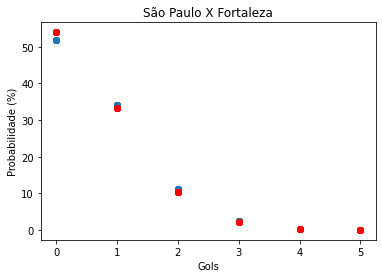

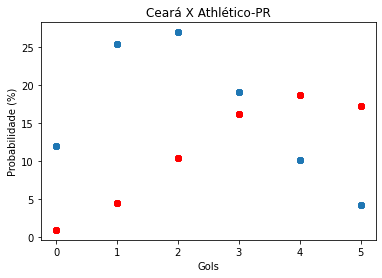

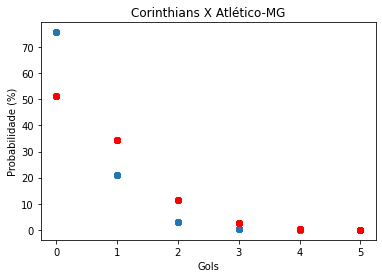

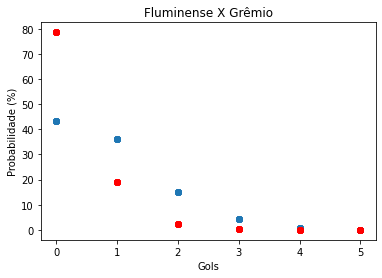

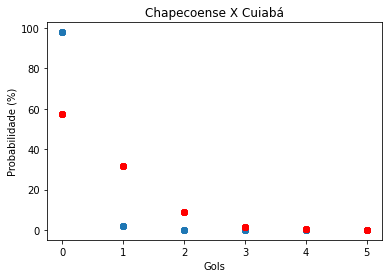

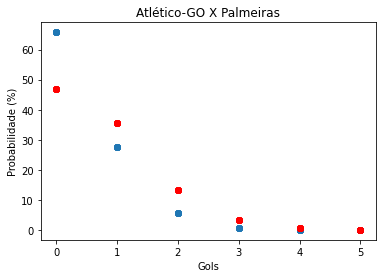

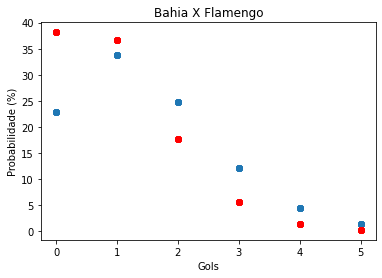

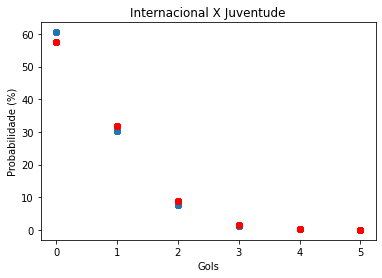

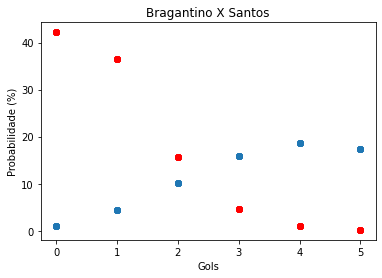

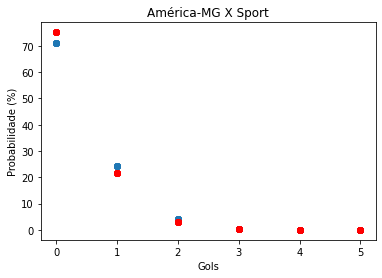

In [51]:
with requests.get('https://api.cartolafc.globo.com/partidas') as response:
    data = response.json()
    for partida in data['partidas']:
        home = partida['clube_casa_id']
        away = partida['clube_visitante_id']
        times = [str(dict(dat)[home]), str(dict(dat)[away])]
        graph(*times)
        print()